# We Rate Dogs Data Analysis 

## Table of Contents

1. [Introduction](#introduction)
2. [Data Wrangling](#data-wrangling)
    1. [Gathering data](#gathering-data)
    2. [Assessing data](#assessing-data)  
        B.1 [Visual assessment](#visual-assessment)  
        B.2 [Programmatic assessment](#programmatic-assessment)  
        B.3 [Issues summary](#issues-summary)  
    3. [Cleaning data](#cleaning-data) 
3. [Analysis and Visualization](#analysis-and-visualization)
4. [Reporting](#reporting)

# Introduction <a name="introduction"></a>
We are going to analyze data coming from the WeRateDogs Twitter account. This project aims to practice thorough data wrangling techniques. Thereafter, we will analyze our clean data to find interesting facts, visualize our findings and write a report.

https://twitter.com/dog_rates/

**About WeRateDogs:**  
WeRateDogs is a Twitter account that humorously introduces dogs. Usually, dogs are being introduced by their name, a photo and a funny comment using doggo lingo, an internet language around the love of dogs. Dogs are mostly being classified according to their dog stage: 'doggo', 'puppo', 'pupper' or 'floofer'. Additionally, dogs are being rated by a not-so-serious number out of 10 points. Usually the number is higher than it's denominator.

**Our data**  
We are going to work on 3 different data sets. Udacity provided a WeRateDogs archive containing tweet data from 11/2015 to 07/2017. As this data sets is not sufficient, we are going to use Twitter's API to find more information. The 3rd data set contains predictions of dog breeds of the tweet images, that was generated using a neural network.


To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
from numpy.polynomial import Polynomial
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import json
import time
import json
import requests
import os
from os import path
import re
from IPython.display import Image
from PIL import Image

from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# style settings
plt.xkcd() # comic style
# pd.set_option('display.max_rows', 2500)
# pd.set_option('display.max_columns', 100)
# pd.set_option('display.max_colwidth', -1)

# Data Wrangling <a name="data-wrangling"></a>
In this section of the project, we first gather our data. Then we make ourselves familiar with the data and asses for quality and tidiness issues. The 3rd step is to to clean our data. In order to prepare our records for analysis, we are going to correct or remove any corrupt, inaccurate and unnecessary observations.   

## Gathering Data <a name="gathering-data"></a>

**WeRateDogs Twitter Archive**  
Read in the first data set: WeRateDogs Twitter archive provided by Udacity.

In [2]:
# read in Twitter archive 
twitter_archive = pd.read_csv('twitter-archive-enhanced-2.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Image Predictions**  
Download and read in image predictions file provided by Udacity.

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

# download file programmatically
response = requests.get(url)
    
# create new file if not existent
if not os.path.exists('image-predictions.tsv'):
    file = open('image-predictions.tsv', 'w')
    file.close()

# open file and write file content
with open('image-predictions.tsv', 'wb') as file_image_predictions:
        file_image_predictions.write(response.content)
        

In [4]:
# load image predictions into data frame
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**Twitter API data**    
We are going to query Twitter's API for additional tweet information using Tweepy and saving it as JSON. 

In [5]:
# Login
with open('logins.json') as login_file:
    logins = json.load(login_file)

# hidden login details
def get_secret(setting, logins=logins):
    """Get login setting or fail with ImproperlyConfigured"""
    try:
        return logins[setting]
    except KeyError:
        raise ImproperlyConfigured("Set the {} setting.".format(setting))

In [6]:
# retrieve Twitter login details - private usage
# consumer_key = get_secret('consumer_key')
# consumer_secret = get_secret('consumer_secret')
# access_token = get_secret('access_token')
# access_secret = get_secret('access_secret')

In [7]:
# access Twitter API, please provide your own Twitter keys

# Redirect to Twitter to authorize
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)

# Get access token
auth.set_access_token(access_token, access_secret)

# API instance
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [8]:
# Request tweets from WeRateDogs Twitter timeline 
start = time.time()
print("Start requesting WeRateDogs tweets.")
with open('tweet_json.txt', 'w', encoding='utf-8') as file:
    file.write("[\n")
    for index, tweet_id in enumerate(twitter_archive.tweet_id.values):
        ranking = index + 1 
        try:
            # Twitter API request using specific tweet_id
            status = api.get_status(tweet_id, tweet_mode='extended')
            status_json = json.dumps(status._json)

            # write json object
            file.write(status_json)
            if ranking < len(twitter_archive.tweet_id.values):
                file.write(",")
            file.write("\n")
            
            # This cell is slow so print ranking to gauge time remaining
            print(ranking, '-', tweet_id)

        except tweepy.TweepError as e:
            # catch erroneos
            e = e.response.text
            print(e)
    file.write("]")
end = time.time()
print("Process finisheed. Time elapsed: ", round((end-start) / 60, 2), "min." )

Start requesting WeRateDogs tweets.
1 - 892420643555336193
2 - 892177421306343426
3 - 891815181378084864
4 - 891689557279858688
5 - 891327558926688256
6 - 891087950875897856
7 - 890971913173991426
8 - 890729181411237888
9 - 890609185150312448
10 - 890240255349198849
11 - 890006608113172480
12 - 889880896479866881
13 - 889665388333682689
14 - 889638837579907072
15 - 889531135344209921
16 - 889278841981685760
17 - 888917238123831296
18 - 888804989199671297
19 - 888554962724278272
{"errors":[{"code":144,"message":"No status found with that ID."}]}
21 - 888078434458587136
22 - 887705289381826560
23 - 887517139158093824
24 - 887473957103951883
25 - 887343217045368832
26 - 887101392804085760
27 - 886983233522544640
28 - 886736880519319552
29 - 886680336477933568
30 - 886366144734445568
31 - 886267009285017600
32 - 886258384151887873
33 - 886054160059072513
34 - 885984800019947520
35 - 885528943205470208
36 - 885518971528720385
37 - 885311592912609280
38 - 885167619883638784
39 - 884925521741

311 - 835309094223372289
312 - 835297930240217089
313 - 835264098648616962
314 - 835246439529840640
315 - 835172783151792128
316 - 835152434251116546
317 - 834931633769889797
318 - 834786237630337024
319 - 834574053763584002
320 - 834477809192075265
321 - 834458053273591808
322 - 834209720923721728
323 - 834167344700198914
324 - 834089966724603904
325 - 834086379323871233
326 - 833863086058651648
327 - 833826103416520705
328 - 833732339549220864
329 - 833722901757046785
330 - 833479644947025920
331 - 833124694597443584
332 - 832998151111966721
333 - 832769181346996225
334 - 832757312314028032
335 - 832682457690300417
336 - 832645525019123713
337 - 832636094638288896
338 - 832397543355072512
339 - 832369877331693569
340 - 832273440279240704
341 - 832215909146226688
342 - 832215726631055365
343 - 832088576586297345
344 - 832040443403784192
345 - 832032802820481025
346 - 831939777352105988
347 - 831926988323639298
348 - 831911600680497154
349 - 831670449226514432
350 - 831650051525054464


634 - 793845145112371200
635 - 793614319594401792
636 - 793601777308463104
637 - 793500921481273345
638 - 793286476301799424
639 - 793271401113350145
640 - 793256262322548741
641 - 793241302385262592
642 - 793226087023144960
643 - 793210959003287553
644 - 793195938047070209
645 - 793180763617361921
646 - 793165685325201412
647 - 793150605191548928
648 - 793135492858580992
649 - 793120401413079041
650 - 792913359805018113
651 - 792883833364439040
652 - 792773781206999040
653 - 792394556390137856
654 - 792050063153438720
655 - 791821351946420224
656 - 791784077045166082
657 - 791780927877898241
658 - 791774931465953280
659 - 791672322847637504
660 - 791406955684368384
661 - 791312159183634433
662 - 791026214425268224
663 - 790987426131050500
664 - 790946055508652032
665 - 790723298204217344
666 - 790698755171364864
667 - 790581949425475584
668 - 790337589677002753
669 - 790277117346975746
670 - 790227638568808452
671 - 789986466051088384
672 - 789960241177853952
673 - 789903600034189313


Rate limit reached. Sleeping for: 517


901 - 758740312047005698
902 - 758474966123810816
903 - 758467244762497024
904 - 758405701903519748
905 - 758355060040593408
906 - 758099635764359168
907 - 758041019896193024
908 - 757741869644341248
909 - 757729163776290825
910 - 757725642876129280
911 - 757611664640446465
912 - 757597904299253760
913 - 757596066325864448
914 - 757400162377592832
915 - 757393109802180609
916 - 757354760399941633
917 - 756998049151549440
918 - 756939218950160384
919 - 756651752796094464
920 - 756526248105566208
921 - 756303284449767430
922 - 756288534030475264
923 - 756275833623502848
924 - 755955933503782912
925 - 755206590534418437
926 - 755110668769038337
927 - 754874841593970688
928 - 754856583969079297
929 - 754747087846248448
930 - 754482103782404096
931 - 754449512966619136
932 - 754120377874386944
{"errors":[{"code":144,"message":"No status found with that ID."}]}
934 - 753655901052166144
935 - 753420520834629632
936 - 753398408988139520
937 - 753375668877008896
938 - 753298634498793472
939 - 7

1219 - 714957620017307648
1220 - 714631576617938945
1221 - 714606013974974464
1222 - 714485234495041536
1223 - 714258258790387713
1224 - 714251586676113411
1225 - 714214115368108032
1226 - 714141408463036416
1227 - 713919462244790272
1228 - 713909862279876608
1229 - 713900603437621249
1230 - 713761197720473600
1231 - 713411074226274305
1232 - 713177543487135744
1233 - 713175907180089344
1234 - 712809025985978368
1235 - 712717840512598017
1236 - 712668654853337088
1237 - 712438159032893441
1238 - 712309440758808576
1239 - 712097430750289920
1240 - 712092745624633345
1241 - 712085617388212225
1242 - 712065007010385924
1243 - 711998809858043904
1244 - 711968124745228288
1245 - 711743778164514816
1246 - 711732680602345472
1247 - 711694788429553666
1248 - 711652651650457602
1249 - 711363825979756544
1250 - 711306686208872448
1251 - 711008018775851008
1252 - 710997087345876993
1253 - 710844581445812225
1254 - 710833117892898816
1255 - 710658690886586372
1256 - 710609963652087808
1257 - 71058

1535 - 689993469801164801
1536 - 689977555533848577
1537 - 689905486972461056
1538 - 689877686181715968
1539 - 689835978131935233
1540 - 689661964914655233
1541 - 689659372465688576
1542 - 689623661272240129
1543 - 689599056876867584
1544 - 689557536375177216
1545 - 689517482558820352
1546 - 689289219123089408
1547 - 689283819090870273
1548 - 689280876073582592
1549 - 689275259254616065
1550 - 689255633275777024
1551 - 689154315265683456
1552 - 689143371370250240
1553 - 688916208532455424
1554 - 688908934925697024
1555 - 688898160958271489
1556 - 688894073864884227
1557 - 688828561667567616
1558 - 688804835492233216
1559 - 688789766343622656
1560 - 688547210804498433
1561 - 688519176466644993
1562 - 688385280030670848
1563 - 688211956440801280
1564 - 688179443353796608
1565 - 688116655151435777
1566 - 688064179421470721
1567 - 687841446767013888
1568 - 687826841265172480
1569 - 687818504314159109
1570 - 687807801670897665
1571 - 687732144991551489
1572 - 687704180304273409
1573 - 68766

Rate limit reached. Sleeping for: 521


1801 - 676975532580409345
1802 - 676957860086095872
1803 - 676949632774234114
1804 - 676948236477857792
1805 - 676946864479084545
1806 - 676942428000112642
1807 - 676936541936185344
1808 - 676916996760600576
1809 - 676897532954456065
1810 - 676864501615042560
1811 - 676821958043033607
1812 - 676819651066732545
1813 - 676811746707918848
1814 - 676776431406465024
1815 - 676617503762681856
1816 - 676613908052996102
1817 - 676606785097199616
1818 - 676603393314578432
1819 - 676593408224403456
1820 - 676590572941893632
1821 - 676588346097852417
1822 - 676582956622721024
1823 - 676575501977128964
1824 - 676533798876651520
1825 - 676496375194980353
1826 - 676470639084101634
1827 - 676440007570247681
1828 - 676430933382295552
1829 - 676263575653122048
1830 - 676237365392908289
1831 - 676219687039057920
1832 - 676215927814406144
1833 - 676191832485810177
1834 - 676146341966438401
1835 - 676121918416756736
1836 - 676101918813499392
1837 - 676098748976615425
1838 - 676089483918516224
1839 - 67589

2117 - 670427002554466305
2118 - 670421925039075328
2119 - 670420569653809152
2120 - 670417414769758208
2121 - 670411370698022913
2122 - 670408998013820928
2123 - 670403879788544000
2124 - 670385711116361728
2125 - 670374371102445568
2126 - 670361874861563904
2127 - 670338931251150849
2128 - 670319130621435904
2129 - 670303360680108032
2130 - 670290420111441920
2131 - 670093938074779648
2132 - 670086499208155136
2133 - 670079681849372674
2134 - 670073503555706880
2135 - 670069087419133954
2136 - 670061506722140161
2137 - 670055038660800512
2138 - 670046952931721218
2139 - 670040295598354432
2140 - 670037189829525505
2141 - 670003130994700288
2142 - 669993076832759809
2143 - 669972011175813120
2144 - 669970042633789440
2145 - 669942763794931712
2146 - 669926384437997569
2147 - 669923323644657664
2148 - 669753178989142016
2149 - 669749430875258880
2150 - 669684865554620416
2151 - 669683899023405056
2152 - 669682095984410625
2153 - 669680153564442624
2154 - 669661792646373376
2155 - 66962

In [9]:
# Read tweet_json.txt file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.
tweets = []
with open('tweet_json.txt', 'r') as file:
    data = json.loads(file.read())
    for i in range(0, len(data)):
        record = {"tweet_id": data[i]["id"], "retweet_count": data[i]['retweet_count'], "favorite_count": data[i]["favorite_count"]}
        tweets.append(record)

tweets_df = pd.DataFrame(tweets)
tweets_df.head()

,favorite_count,retweet_count,tweet_id
0,37626,8203,892420643555336193
1,32333,6068,892177421306343426
2,24362,4011,891815181378084864
3,40953,8365,891689557279858688
4,39154,9056,891327558926688256


## Assassing Data <a name="assessing-data"></a>
In this section, we are getting acquainted with our data, using visual and programmatic tools. We are going to watch out for low quality content issues and structural issues. Unclean data is being documented at the end of the assessment section. 

### Visual assessment<a name="visual-assessment"></a>
Here, we are scanning visually through our data sets. Please be aware that most of the visual assessment was being done using Excel for convenience reasons.

In [10]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
tweets_df

,favorite_count,retweet_count,tweet_id
0,37626,8203,892420643555336193
1,32333,6068,892177421306343426
2,24362,4011,891815181378084864
3,40953,8365,891689557279858688
4,39154,9056,891327558926688256
5,19690,3008,891087950875897856
6,11512,1988,890971913173991426
7,63487,18225,890729181411237888
8,27077,4128,890609185150312448
9,31025,7125,890240255349198849


In [12]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


### Programmatic assessment<a name="programmatic-assessment"></a>

**Assess Twitter archive**

In [13]:
# Assess Twitter achive.
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Assessing retweets in Twitter archive. We identify retweets by a non-null value in "in_reply_to_status". 
retweets = twitter_archive[twitter_archive.retweeted_status_id.notna()]['retweeted_status_id'].values.astype(np.int64)
twitter_archive[twitter_archive.retweeted_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [15]:
# Test if original tweets of retweets are in Twitter archive.
original_tweets = []
[original_tweets.append(retweet) for retweet in retweets if retweet in twitter_archive.tweet_id.values]
print(len(original_tweets), "original entries out of the retweets are contained in Twitter archive.\n")  

112 original entries out of the retweets are contained in Twitter archive.



In [16]:
# Show all replies to assess if they are relevant for our research.
# We identify retweets by a non-null value in "in_reply_to_status". 
twitter_archive[twitter_archive.in_reply_to_status_id.notna()][['tweet_id','text']]

# -> Some replies are actually Dog Rating posts.

,tweet_id,text
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner yo...
55,881633300179243008,@roushfenway These are good dogs but 17/10 is ...
64,879674319642796034,@RealKentMurphy 14/10 confirmed
113,870726314365509632,@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...
148,863427515083354112,@Jack_Septic_Eye I'd need a few more pics to p...
149,863079547188785154,Ladies and gentlemen... I found Pipsy. He may ...
179,857214891891077121,@Marc_IRL pixelated af 12/10
184,856526610513747968,"THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY..."
186,856288084350160898,@xianmcguire @Jenna_Marbles Kardashians wouldn...
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10...


In [17]:
# Assess dog names
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
Sadie         8
the           8
an            7
Buddy         7
Daisy         7
Toby          7
Bailey        7
Rusty         6
Scout         6
Milo          6
Oscar         6
Koda          6
Dave          6
Jax           6
Stanley       6
Bella         6
Jack          6
Leo           6
Sammy         5
           ... 
Barry         1
Ronduh        1
Buckley       1
Ronnie        1
Sailer        1
Brandi        1
Doobert       1
Chuq          1
Amy           1
Brownie       1
Amélie        1
Dot           1
Kulet         1
Barney        1
Fido          1
Godzilla      1
Rolf          1
Kirk          1
Emma          1
Geno          1
General       1
Dobby         1
Rufio         1
Charl         1
Gòrdón        1
Raphael       1
DayZ          1
Dutch         1
Lucia         1
Duddles       1
Name: name, Length: 957,

In [18]:
# After finding typical mistakes, I'm checking if there is a pattern to recover names  
determiners = ["a", "an", "the", "officially", "old", "just", "quite", "getting", "actually", "mad", "not", "my", "by", "very", "one", "this", "life", "all", "such", "None"]

# loop trough names column and print each text of the text column whenever name equals determiner
for i, row in twitter_archive.iterrows():
    if row['name'] in determiners:
        print(i , "-", row['text'])

5 - Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7 - When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12 - Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
22 - I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba
24 - You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25 - This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
30 - @NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution
32 - RT @Athletics: 12/1

419 - We only rate dogs. Please don't send pics of men capturing low level clouds. Thank you... 11/10 https://t.co/rLi83ZyCL5
427 - @imgur for a polar bear tho I'd say 13/10 is appropriate
429 - Here's a doggo who looks like he's about to give you a list of mythical ingredients to go collect for his potion. 11/10 would obey https://t.co/8SiwKDlRcl
433 - The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
434 - RT @dog_rates: We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10

https://t…
436 - We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10

https://t.co/XQlmPTLHPl https://t.co/ZNIkkHgtYE
437 - I've never wanted to go to a camp more in my entire life. 12/10 for all on board https://t.co/wJZlpGFEbD
440 - Here we have a doggo who has messed up. He was hoping you wouldn't notice. 11/10 someone help him https://t.co/

746 - Here's a doggo questioning his entire existence. 10/10 someone tell him he's a good boy  https://t.co/dVm5Hgdpeb
748 - Have you ever seen such a smol pupper? Portable af. 12/10 would keep in shirt pocket https://t.co/KsqaIzlQ12
751 - Everybody drop what you're doing and look at this dog. 13/10 must be super h*ckin rare https://t.co/I1bJUzUEW5
753 - RT @dog_rates: In case you haven't seen the most dramatic sneeze ever... 13/10 https://t.co/iy7ylyZcsE
754 - Oh my god it's Narcos but Barkos. 13/10 someone please make this happen
https://t.co/tird9cIlzB
758 - RIP Loki. Thank you for the good times. You will be missed by many. 14/10 https://t.co/gJKD9pst5A
759 - RT @dog_rates: This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR
762 - Evolution of a pupper yawn featuring Max. 12/10 groundbreaking stuff https://t.co/t8Y4x9DmVD
766 - "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not

1146 - When you're trying to enjoy yourself but end up having to take care of your way too drunk friend. 11/10 https://t.co/BRkhj6tdN0
1150 - I'm getting super heckin frustrated with you all sending in non canines like this ostrich. We only rate dogs... 9/10 https://t.co/Rgbni2Ns8z
1154 - Pup had to be removed cuz it wouldn't have been fair to the opposing team. 13/10 absolute legend ⚽️
https://t.co/BHICimO58W
1156 - Nothin better than a doggo and a sunset. 11/10 https://t.co/JlFqOhrHEs
1165 - Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1171 - Garden's coming in nice this year. 10/10 https://t.co/5Lra3e4rrw
1176 - This doggo was initially thrilled when she saw the happy cartoon pup but quickly realized she'd been deceived. 10/10 https://t.co/mvnBGaWULV
1184 - We normally don't rate marshmallows but this one appears to be flawlessly toasted so I'll make an exception. 10/10 https://t.co/D9jbbmPmos
1186 - Get you a pup that can do both. 10/10 https://t.co/zSbyvm62xZ
1

1468 - "Martha come take a look at this. I'm so fed up with the media's unrealistic portrayal of dogs these days." 10/10 https://t.co/Sd4qAdSRqI
1471 - These lil fellas are the best of friends. 12/10 for both. 1 like = 1 friend (vid by @CassieBrookee15) https://t.co/gzRghPC61H
1473 - What kind of person sends in a pic without a dog in it? So churlish. Neat rug tho 7/10 https://t.co/LSTAwTdTaw
1474 - BREAKING PUPDATE: I've just been notified that (if in U.S.) this dog appears to be operating the vehicle. Upgraded to 10/10. Skilled af
1476 - This pupper is afraid of its own feet. 12/10 would comfort https://t.co/Tn9Mp0oPoJ
1477 - When you keepin the popcorn bucket in your lap and she reach for some... 10/10 https://t.co/a1IrjaID3X
1479 - Personally I'd give him an 11/10. Not sure why you think you're qualified to rate such a stellar pup.
@CommonWhiteGirI
1483 - I hope you guys enjoy this beautiful snowy pupper as much as I did. 11/10 https://t.co/DYUsHtL2aR
1486 - "Thank you friend that 

1770 - This pupper likes tape. 12/10 https://t.co/cSp6w5GWgm
1772 - Another spooky pupper here. Most definitely floating. No legs. Probably knows some dark magic. 10/10 very spooked https://t.co/JK8MByRzgj
1774 - After getting lost in Reese's eyes for several minutes we're going to upgrade him to a 13/10
1777 - "Everything looks pretty good in there. Make sure to brush your gums. Been flossing? How's school going?" Both 10/10 https://t.co/lWL2IMJqLR
1778 - Guys this was terrifying. Really spooked me up. We don't rate ghosts. We rate dogs. Please only send dogs... 9/10 https://t.co/EJImi1udYb
1779 - IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq
1782 - This was Cindy's face when she heard Susan forgot the snacks for after the kid's soccer game. 11/10 https://t.co/gzkuVGRgAD
1783 - Endangered triangular pup here. Could be a wizard. Caught mid-laugh. No legs. Just fluff. Probably a wizard. 9/10 https://t.co/GFVIHIod0Z
1784 - In honor of the new Star Wars movie. Her

1896 - "🎶 DO YOU BELIEVE IN LIFE AFTER LOVE 🎶"
11/10 https://t.co/URNs5zFskc
1901 - Two gorgeous dogs here. Little waddling dog is a rebel. Refuses to look at camera. Must be a preteen. 5/10 &amp; 8/10 https://t.co/YPfw7oahbD
1902 - When you see sophomores in high school driving. 11/10 https://t.co/m6aC8d1Kzp
1903 - This pupper is fed up with being tickled. 12/10 I'm currently working on an elaborate heist to steal this dog https://t.co/F33n1hy3LL
1904 - Rare submerged pup here. Holds breath for a long time. Frowning because that spoon ignores him. 5/10 would still pet https://t.co/EJzzNHE8bE
1905 - The 13/10 also takes into account this impeccable yard. Louis is great but the future dad in me can't ignore that luscious green grass
1907 - This pupper just wants a belly rub. This pupper has nothing to do w the tree being sideways now. 10/10 good pupper https://t.co/AyJ7Ohk71f
1914 - 13/10
@ABC7
1916 - This is life-changing. 12/10 https://t.co/SroTpI6psB
1918 - "AT DAWN, WE RIDE"
10/10 f

2201 - Incredibly rare dog here. Good at bipedalism. Rad blue spikes. Ready to dance. 11/10 https://t.co/70X1TIXn38
2202 - Fascinating dog here. Loves beach. Oddly long nose for dog. Massive ass paws. Hard to cuddle w. 3/10 would still pet https://t.co/IiSdmhkC5N
2204 - This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg
2211 - Here is a horned dog. Much grace. Can jump over moons (dam!). Paws not soft. Bad at barking. 7/10 can still pet tho https://t.co/2Su7gmsnZm
2212 - Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3
2214 - It is an honor to rate this pup. He is a Snorklhuahua from Amarillo. A true renaissance dog. Also part Rudolph 10/10 https://t.co/ALNyYuGui7
2215 - There's a lot going on here but in my honest opinion every dog pictured is pretty fabulous. 10/10 for all. Good dogs https://t.co/VvYVbsi6c3
2218

In [19]:
# Assess whether dog stages were correctly extracted from text.
stages = ["doggo", "floofer", "pupper", "puppo"]
for i,row in twitter_archive.iterrows():
    for stage in stages:
        if row[stage] == stage: 
            if not row['text'].find(stage):
                print("Incorrectly extracted dog stage: \n", row)

In [20]:
# Assess whether names were extracted correctly.  
for i,row in twitter_archive.iterrows():
    if not row['name'] in row['text'] and (row['name'] != "None"):
        print(row.tweet_id, row.text, row.name, "\n")

In [21]:
# Assess rating_numerator.
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
# Checking numerators of 0.
twitter_archive.query('rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [23]:
# Assessing numerators reveals floats were incorrectly extracted as ints.
rating_pattern = re.compile(r'\d*\.*\d*/10')
for i, row in twitter_archive.iterrows():
    result = rating_pattern.search(row['text'])
    if result:
        if not result.group()[:-3] == str(row['rating_numerator']):
            print(row['tweet_id'])
            print(result.group()[:-3], "-", row['rating_numerator'])

883482846933004288
13.5 - 5
835246439529840640
13 - 960
832215909146226688
9.75 - 75
826598799820865537
007 - 7
786709082849828864
9.75 - 75
778027034220126208
11.27 - 27
775096608509886464
14 - 9
772114945936949249
.10 - 10
759566828574212096
...10 - 10
748977405889503236
...10 - 10
747594051852075008
...11 - 11
747512671126323200
...10 - 10
747103485104099331
...11 - 11
746872823977771008
...11 - 11
746369468511756288
...9 - 9
740373189193256964
14 - 9
740214038584557568
...10 - 10
739544079319588864
...10 - 10
738402415918125056
...10 - 10
736010884653420544
...10 - 10
733482008106668032
...10 - 10
722974582966214656
13 - 4
716439118184652801
11 - 50
709852847387627521
...12 - 12
706291001778950144
...11 - 11
706153300320784384
.13 - 13
704847917308362754
...12 - 12
702217446468493312
...9 - 9
697259378236399616
...8 - 8
685532292383666176
...9 - 9
684594889858887680
...10 - 10
682962037429899265
10 - 7
681340665377193984
9.5 - 5
680494726643068929
11.26 - 26
666287406224695296
9 - 

In [24]:
# Show all denominators that are not 10 to identify possible reasons.
for i,row in twitter_archive.iterrows():
    if not row['rating_denominator'] == 10:
        print(row.tweet_id, "\n", row.text)
        print("Numerator: ", row.rating_numerator, "\nDenominator: ", row.rating_denominator, "\n")

835246439529840640 
 @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Numerator:  960 
Denominator:  0 

832088576586297345 
 @docmisterio account started on 11/15/15
Numerator:  11 
Denominator:  15 

820690176645140481 
 The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
Numerator:  84 
Denominator:  70 

810984652412424192 
 Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
Numerator:  24 
Denominator:  7 

775096608509886464 
 RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…
Numerator:  9 
Denominator:  11 

758467244762497024 
 Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
Numerator:  165 
Denominator:  150 

740373189193256964 
 After so many r

In [25]:
# Assess dog stages to see the count of each.
print(twitter_archive.doggo.value_counts(), "\n")
print(twitter_archive.floofer.value_counts(), "\n")
print(twitter_archive.pupper.value_counts(), "\n")
print(twitter_archive.puppo.value_counts(), "\n")

None     2259
doggo      97
Name: doggo, dtype: int64 

None       2346
floofer      10
Name: floofer, dtype: int64 

None      2099
pupper     257
Name: pupper, dtype: int64 

None     2326
puppo      30
Name: puppo, dtype: int64 



In [26]:
# Asses for duplicates.
print("Number of duplicated tweet ids:", len(twitter_archive[twitter_archive.tweet_id.duplicated(keep=False)]))
twitter_archive[twitter_archive.tweet_id.duplicated()]

Number of duplicated tweet ids: 0


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [27]:
# Tweets containing "We only rate dogs caught my attention", however it seems to be a joke for dogs that don't look like dogs. 
# Print every row that contains We only rate dogs" or "We. Only. Rate. Dogs."
pattern = re.compile(r'we.? only.? rate.? dogs', re.IGNORECASE)
for i, row in twitter_archive.iterrows():
    if pattern.search(row['text']):
        print(row['text'])

This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
Ugh not again. We only rate dogs. Please don't send in well-dressed  floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf
I can't believe this keeps happening. This, is a birb taking a bath. We only rate dogs. Please only send dogs. Thank you... 12/10 https://t.co/pwY9PQhtP2
We. Only. Rate. Dogs. Do not send in other things like this fluffy floor shark clearly ready to attack. Get it together guys... 12/10 https://t.co/BZHiKx3FpQ
RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…
Unbelievable. We only rate dogs. Please don't send in non-canines like the "I" from Pixar's opening credits. Thank you... 12/10 https://t.co/JMhDNv5wXZ
Oh my this spooked me up. We only rate dogs, not happy ghosts. Please send dogs

##### Assessing tweets data

In [28]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
favorite_count    2337 non-null int64
retweet_count     2337 non-null int64
tweet_id          2337 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [29]:
tweets_df.head()

,favorite_count,retweet_count,tweet_id
0,37626,8203,892420643555336193
1,32333,6068,892177421306343426
2,24362,4011,891815181378084864
3,40953,8365,891689557279858688
4,39154,9056,891327558926688256


##### Assessing image predictions data

In [30]:
image_predictions.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1456,777641927919427584,https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg,1,golden_retriever,0.964929,True,Labrador_retriever,0.011584,True,refrigerator,0.007499,False
926,702598099714314240,https://pbs.twimg.com/media/CcAhPevW8AAoknv.jpg,1,kelpie,0.219179,True,badger,0.133584,False,Siamese_cat,0.074440,False
1058,714957620017307648,https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg,1,Great_Pyrenees,0.251516,True,Samoyed,0.139346,True,kuvasz,0.129005,True
1642,807621403335917568,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,3,golden_retriever,0.873233,True,cocker_spaniel,0.033693,True,chow,0.020408,True
1828,835574547218894849,https://pbs.twimg.com/media/C5iOnigWcAAU3Ry.jpg,1,Staffordshire_bullterrier,0.610655,True,muzzle,0.132138,False,American_Staffordshire_terrier,0.109544,True
688,684177701129875456,https://pbs.twimg.com/media/CX6v_JOWsAE0beZ.jpg,1,chow,0.334783,True,German_shepherd,0.162647,True,golden_retriever,0.138612,True
504,675888385639251968,https://pbs.twimg.com/media/CWE85snWIAEG5ES.jpg,1,West_Highland_white_terrier,0.672117,True,Old_English_sheepdog,0.146147,True,komondor,0.023141,True
1953,863907417377173506,https://pbs.twimg.com/media/C_03NPeUQAAgrMl.jpg,1,marmot,0.358828,False,meerkat,0.174703,False,weasel,0.123485,False
481,675362609739206656,https://pbs.twimg.com/media/CV9etctWUAAl5Hp.jpg,1,Labrador_retriever,0.479008,True,ice_bear,0.218289,False,kuvasz,0.139911,True
546,677328882937298944,https://pbs.twimg.com/media/CWZbBlAUsAAjRg5.jpg,1,water_buffalo,0.424250,False,kelpie,0.029054,True,Staffordshire_bullterrier,0.028470,True


In [31]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
image_predictions.tweet_id.duplicated().sum()

0

###  Issues summary<a name="issues-summary"></a>
#### Quality  

_**Twitter Archive table**_
- Dogs without stage should have an additional stage: "without stage"
- Irrelevant tweets (retweets and replies)
- Irrelevant tweets (non-doge content)
- Unnecessary shortened url in text
- Incorrect and missing dog names
- Incorrectly extracted and unnormalized ratings
- Dogs with ambiguous stages
- Erroneous data types (timestamp, dog_stage, rating_numerator)

_**Image Predictions table**_
- Dog breed predictions contain non-dog breeds
- Dog breeds (p1, p2, p3) contain underscores and are lowercase.

_**Tweets table**_ 
- Contains fewer ids compared to Twitter archive due to errors during API request  

_**Combined table**_   
- Irrelevant columns

#### Tidiness

_**Twitter Archive table**_
- Dog stages doggo, floofer, pupper, puppo and without stage should be one column 
- 3 separate tables serving the same purpose


## Cleaning Data <a name="cleaning-data"></a>
We are now goint to prepare our data for analysis. Any corrupt, inaccurate and unnecessary observations are being corrected or removed with the goal to create a master dataframe to work with. 
### Tidiness


In [33]:
# Create copies of data frames
dogs_clean = twitter_archive
tweets_clean = tweets_df
images_clean = image_predictions

_**Twitter Archive:**_  

_**- Dog stages doggo, floofer, pupper, puppo and without stage should be one column**_  

_**- Quality: Dogs without stage should have an additional stage: "without stage"**_  

_**Define**_

Create one single dog_stage column to assign the stage of a dog to each tweet. If a dog doesn't have a stage assigned by a user, consider it as stage category "without stage". Hence, start by creating an additional column "without_stage" for tweets without dog stage. Then, use the 5 columns of doggo floofer, pupper, puppo and without_stage to melt them into a single column dog_stage.

_**Code**_

In [34]:
# create a dog status column by using doggo column
column_names = ['tweet_id','in_reply_to_status_id','in_reply_to_user_id', \
                'timestamp','source','text','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp',\
                'expanded_urls','rating_numerator','rating_denominator','name']

# add column for dogs without dog stage
dogs_clean['without_stage'] = "placeholder"

# assign None stage to every tweet with no value in doggo, floofer, pupper nor puppo
for i, row in dogs_clean.iterrows():
    if row.loc['doggo'] == row.loc['floofer'] == row.loc['pupper'] == row.loc['puppo'] == "None":
        dogs_clean.at[i, 'without_stage'] = "without stage"

# melt dog stages into rows
dogs_clean = pd.melt(dogs_clean, id_vars=column_names, var_name='placeholder', value_name='dog_stage')

# keep only rows that contain None or placeholder in dog_stage
dogs_clean = dogs_clean[(dogs_clean.dog_stage == "doggo") 
                        | (dogs_clean.dog_stage == "floofer") 
                        | (dogs_clean.dog_stage == "pupper")
                        | (dogs_clean.dog_stage == "puppo")
                        | (dogs_clean.dog_stage == "without stage")]

dogs_clean = dogs_clean.drop(['placeholder'], axis=1).reset_index(drop=True)

_**Test**_

In [35]:
# Test if only one column left with at least 2356 observations, plus possible rows with multiple stage observations. 
dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 14 columns):
tweet_id                      2370 non-null int64
in_reply_to_status_id         79 non-null float64
in_reply_to_user_id           79 non-null float64
timestamp                     2370 non-null object
source                        2370 non-null object
text                          2370 non-null object
retweeted_status_id           183 non-null float64
retweeted_status_user_id      183 non-null float64
retweeted_status_timestamp    183 non-null object
expanded_urls                 2311 non-null object
rating_numerator              2370 non-null int64
rating_denominator            2370 non-null int64
name                          2370 non-null object
dog_stage                     2370 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 259.3+ KB


In [36]:
if len(dogs_clean) > len(twitter_archive): 
    print("Dogs with multiple stages: " , len(dogs_clean) - len(twitter_archive))

Dogs with multiple stages:  14


In [37]:
# test if only valid dog stages left
stages = ["without stage", "doggo", "pupper", "puppo", "floofer"]
for stage in dogs_clean.dog_stage.values:
    if not stage in stages:
        print("Test failed. Invalid dog stage") 

In [38]:
dogs_clean.dog_stage.value_counts()

without stage    1976
pupper            257
doggo              97
puppo              30
floofer            10
Name: dog_stage, dtype: int64

_**3 separate tables serving the same purpose**_

_**Define**_

Join dogs_clean table and tweets_df table using 'tweet_id', removing non-matching tweet_ids. Next, join new dogs table and image predictions table on their common tweet_id.

_**Code**_

In [39]:
# merge dogs and tweets table 
master_df = pd.merge(dogs_clean, tweets_clean, how='inner',  on='tweet_id')

# merge dogs and image predications tables 
master_df = pd.merge(master_df, images_clean, how='inner',  on='tweet_id')

_**Test**_

In [40]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2077
Data columns (total 27 columns):
tweet_id                      2078 non-null int64
in_reply_to_status_id         24 non-null float64
in_reply_to_user_id           24 non-null float64
timestamp                     2078 non-null object
source                        2078 non-null object
text                          2078 non-null object
retweeted_status_id           77 non-null float64
retweeted_status_user_id      77 non-null float64
retweeted_status_timestamp    77 non-null object
expanded_urls                 2078 non-null object
rating_numerator              2078 non-null int64
rating_denominator            2078 non-null int64
name                          2078 non-null object
dog_stage                     2078 non-null object
favorite_count                2078 non-null int64
retweet_count                 2078 non-null int64
jpg_url                       2078 non-null object
img_num                       2078 no

### Quality

_**Twitter archive: Irrelevant tweets (retweets and replies)**_

_**Define**_  
All retweets are irrelevant to our analysis. So, remove all retweets by keeping only records containing a null value in 'retweeted_status_id'.   

Most replies are irrelevant to our analysis, but some are actually dog rating postings. We have collected all valid replies in a list provided below. Remove only irrelevant replies to tweets. We recognize replies because of a not-nan value in the 'in_reply_to_status_id' column.

_**Code**_

In [41]:
# Remove all retweets.
# Convert retweeted status id into string
master_df.retweeted_status_id = master_df.retweeted_status_id.astype('str')

# Only keep observations that contain a nan string in retweeted status id
master_df = master_df[master_df.retweeted_status_id == 'nan']

In [42]:
# find all replies
replies = list(master_df[master_df.in_reply_to_status_id.notna()]['tweet_id'].values.astype(np.int64))

# We found that most replies are irrelevant to our research, accept for the replies containing following tweet ids 
valid_replies = [863079547188785154, 856526610513747968, 847617282490613760, 802265048156610565, 786051337297522688, 
                 766714921925144576, 704871453724954624,675870721063669760, 675707330206547968, 669353438988365824]

# Remove valid replies from our list of replies
[replies.remove(el) for el in valid_replies if el in replies]

[None, None, None, None, None, None, None]

In [43]:
# Remove remaining replies
for i, row in master_df.iterrows():
    if row.loc['tweet_id'] in replies:
        master_df = master_df.drop([i])

_**Test**_

In [44]:
# only 6 replies should be left
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2077
Data columns (total 27 columns):
tweet_id                      1983 non-null int64
in_reply_to_status_id         6 non-null float64
in_reply_to_user_id           6 non-null float64
timestamp                     1983 non-null object
source                        1983 non-null object
text                          1983 non-null object
retweeted_status_id           1983 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1983 non-null object
rating_numerator              1983 non-null int64
rating_denominator            1983 non-null int64
name                          1983 non-null object
dog_stage                     1983 non-null object
favorite_count                1983 non-null int64
retweet_count                 1983 non-null int64
jpg_url                       1983 non-null object
img_num                       1983 non-n

_**Twitter archive: Unnecessary shortened url in text**_

_**Define**_  
Replace all shortened urls starting by "https://t.co/" by empty string in text column.

_**Code**_

In [45]:
master_df['text'] = master_df['text'].str.replace('https://t.co/\S+', '', case=False)

_**Test**_

In [46]:
for i, row in master_df.iterrows():
    if "http" in row['text']:
        print("Url found: \n", row['text'])
    if "www" in row['text']:
         print("www Url found: \n", row['text'])

In [47]:
master_df.text.sample(20)


1144    This is Bluebert. He just saw that both #Final...
808     This is Earl. He can't catch. Did his best tho...
945     This is Beckham. He fell asleep at the wheel. ...
1056    When a single soap orb changes your entire per...
1536    This is officially the greatest yawn of all ti...
768     This is Duke. He sneaks into the fridge someti...
661     This is Mary. She's desperately trying to recr...
884     Say hello to Oakley and Charlie. They're convi...
1045    This is Chip. He only mowed half the yard. 8/1...
141     This is Willem. He's a Penn State pupper. Thin...
1564    Endangered triangular pup here. Could be a wiz...
905     This is Belle. She's a Butterflop Hufflepoof. ...
1399                         Downright majestic af 12/10 
1918    This is Ruffles. He is an Albanian Shoop Da Wh...
1822    Say hello to Gin &amp; Tonic. They're having a...
1713    Say hello to Kenzie. She is a fluff ball. 12/1...
1229    This is Cassie. She can go from sweet to scary...
13      This i

_**Twitter archive: Incorrect and missing dog names**_

_**Define**_  
The names "a, an, my, the, officially, old, just, quite, getting, actually, mad, not, by, very, one, this, life, all, such, my. None" are incorrect. Some names are actually missing in the tweet, but some were only wrongly extracted. Particularly when the text structure was "named _dogname_" or "name _dogname_". 
Recover missing names using a regex for aforemetioned text structure, else and replace dog name by a null value.  

There were additional dog names missed, that we collected during assessment. Some were missed due to atypcal text structure and some were missed due to multiple dogs in one picture/tweets (Dexter, Burke and Lila). Recover dog names using our dictionary of missing dog names. 

_**Code**_

In [48]:
# After finding typical mistakes, I'm checking if there is a pattern to recover names  
determiners = ["a", "an", "the", "officially", "old", "just", "quite", "getting", "actually", "mad", "not", "my", "by", "very", "one", "this", "life", "all", "such", "None"]

In [49]:
pattern1 = re.compile(r'named [A-Za-z]+')
pattern2 = re.compile(r'name\.? is\.? [A-Za-z]+', re.IGNORECASE)

# extract names from text
def extract_name(row):
    name_result1 = re.search(pattern1, row['text'])
    name_result2 = re.search(pattern2, row['text'])
    
    if name_result1:
        new_name = name_result1.group().split()[1]
    elif name_result2:
        new_name = name_result2.group().split()[2]
    else:
        new_name = np.nan
    return new_name
    
# replace names if 
for i, row in master_df.iterrows():
    if row['name'] in determiners:
        new_name = extract_name(row)
        master_df.at[i, 'name'] = new_name

In [50]:
missing_names = [(826204788643753985, "Dew"), (854120357044912130, "Cooper"), (778039087836069888, "Max"), 
                   (685547936038666240, "Jack"),(878604707211726852, "Martha"), (863079547188785154, "Pipsy"), 
                   (856526610513747968, "Charly"), (847617282490613760, "Cannon"), (844979544864018432, "Toby"),
                   (836001077879255040, "Atlas"), (831650051525054464, "Blue"), (811647686436880384, "Augie"), 
                   (778408200802557953, "Loki"), (758041019896193024, "Teagan"), (740373189193256964, "Bretagne"), 
                   (708026248782585858, "Frank"), (704871453724954624, "Pipsie"), (695064344191721472, "Charles"), 
                   (692142790915014657, "Teddy"), (685681090388975616, "Jack"), (685325112850124800, "Tristan"), 
                   (684538444857667585, "Pippa"), (678023323247357953, "Reese"), (677687604918272002, "Cindy"),
                   (676590572941893632, "Bubbles"), (675870721063669760, "Yoshi"), (669684865554620416, "Dug"), 
                   (668142349051129856, "Oliver"), (748692773788876800, "Quizno")]


missing_names_double = [(808106460588765185, "doggo", "Dexter"), 
                        (808106460588765185, "pupper", "Burke"), 
                        (759793422261743616, "pupper", "Lila")]     


In [51]:
# Match tweets with missing name provided in the set and assign new name accordingly
for el in missing_names:
    # find row with matching tweet_id
    for i, row in master_df.iterrows():
        if row['tweet_id'] == el[0]:
            master_df.at[i, 'name'] = el[1]

In [52]:
# Add info of Dexter, Burke and Lila
for el in missing_names_double:
    # find row with matching tweet_id
    for i, row in master_df.iterrows():
        if row['tweet_id'] == el[0] and row['dog_stage'] == el[1]:
            master_df.at[i, 'name'] = el[2]

_**Test**_

In [53]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 2077
Data columns (total 27 columns):
tweet_id                      1983 non-null int64
in_reply_to_status_id         6 non-null float64
in_reply_to_user_id           6 non-null float64
timestamp                     1983 non-null object
source                        1983 non-null object
text                          1983 non-null object
retweeted_status_id           1983 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1983 non-null object
rating_numerator              1983 non-null int64
rating_denominator            1983 non-null int64
name                          1406 non-null object
dog_stage                     1983 non-null object
favorite_count                1983 non-null int64
retweet_count                 1983 non-null int64
jpg_url                       1983 non-null object
img_num                       1983 non-n

In [54]:
# all determiners are gone, names were correctly extracted
for el in determiners:
    if el in master_df.values:
        print("Determiner not extracted")

In [55]:
master_df.sample(20)['name']

1416       Louis
1553         NaN
1825         NaN
1919      Amélie
1102       Karll
1876       Louie
1072         Jax
1335       Wyatt
814          NaN
867         Fizz
2058         NaN
532      Vincent
1104       Blitz
263       Dwight
273     Godzilla
1413       Derby
1559         NaN
1611         NaN
1180         NaN
1643         NaN
Name: name, dtype: object

In [56]:
# check Burke, Dexter and Lila were renamed 
for name in missing_names_double: 
    if not master_df.name.where(master_df['name'] == name).any():
        print(name[2], "OK")

Dexter OK
Burke OK
Lila OK


_**Twitter archive: Incorrectly extracted and unnormalized ratings**_

_**Define**_   
We found rating_numerator's were incorrectly extracted as ints instead of floats, which resulted in wrong numerators. Additionally, some values were wrongly extracted by taking the wrong numbers. We found that denominators not being 10 is an indication for a falsy extraction. To correct the ratings, first convert rating_numerator into a float datatype. Use the corrected ratings dictionary below to correct rating_numerator, which includes corrected values of wrongly extracted values and values that were not normalized to 10. Subsequentially change their denominator to 10.

_**Code**_

In [57]:
# falsy ratings and their corrected and normalized numerator
corrected_ratings = [{'tweet_id': 820690176645140481, 'rating_numerator': 12}, 
                     {'tweet_id': 722974582966214656, 'rating_numerator': 13},
                     {'tweet_id': 716439118184652801, 'rating_numerator': 11},
                     {'tweet_id': 713900603437621249, 'rating_numerator': 11},
                     {'tweet_id': 710658690886586372, 'rating_numerator': 10},
                     {'tweet_id': 704054845121142784, 'rating_numerator': 12},
                     {'tweet_id': 697463031882764288, 'rating_numerator': 12},
                     {'tweet_id': 684222868335505415, 'rating_numerator': 11},
                     {'tweet_id': 682962037429899265, 'rating_numerator': 10},
                     {'tweet_id': 677716515794329600, 'rating_numerator': 12},
                     {'tweet_id': 675853064436391936, 'rating_numerator': 11},
                     {'tweet_id': 666287406224695296, 'rating_numerator': 9},
                     {'tweet_id': 740373189193256964, 'rating_numerator': 14},
                     {'tweet_id': 786709082849828864, 'rating_numerator': 9.75},
                     {'tweet_id': 778027034220126208, 'rating_numerator': 11.27},
                     {'tweet_id': 680494726643068929, 'rating_numerator': 11.26},
                     {'tweet_id': 758467244762497024, 'rating_numerator': 11},          
                    ]

In [58]:
# To float
master_df.rating_numerator = master_df.rating_numerator.astype('float')

# replace falsy numerators by their corrected and normalized values. Set their denominator to 10.
for rating in corrected_ratings:
    master_df.loc[master_df['tweet_id'] == rating['tweet_id'], 'rating_numerator'] = rating['rating_numerator']
    master_df.loc[master_df['tweet_id'] == rating['tweet_id'], 'rating_denominator'] = 10

In [59]:
# remove all remaining records containing a denominator other than 10
master_df = master_df[master_df.rating_denominator == 10]

_**Test**_

In [60]:
# Test if ratings were replaced correctly
for rating in corrected_ratings:
    print(master_df.loc[master_df['tweet_id'] == rating['tweet_id']][['rating_numerator', 'rating_denominator']])

     rating_numerator  rating_denominator
613              12.0                  10
      rating_numerator  rating_denominator
1116              13.0                  10
      rating_numerator  rating_denominator
1144              11.0                  10
      rating_numerator  rating_denominator
1164              11.0                  10
      rating_numerator  rating_denominator
1187              10.0                  10
      rating_numerator  rating_denominator
1260              12.0                  10
      rating_numerator  rating_denominator
1323              12.0                  10
      rating_numerator  rating_denominator
1457              11.0                  10
      rating_numerator  rating_denominator
1475              10.0                  10
      rating_numerator  rating_denominator
1560              12.0                  10
      rating_numerator  rating_denominator
1609              11.0                  10
      rating_numerator  rating_denominator
2057         

In [61]:
# all rating_denominators are 10
master_df[master_df.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


_**Dogs with ambiguous stages**_

_**Define**_  
Find all dogs with multiple stages and evaluate by their text what stage makes sense. Drop the invalid observation.

_**Code**_

In [67]:
master_df[master_df.tweet_id.duplicated()]['tweet_id']

7     855851453814013952
9     854010172552949760
37    817777686764523521
43    808106460588765185
47    801115127852503040
54    785639753186217984
67    759793422261743616
76    751583847268179968
83    741067306818797568
87    733109485275860992
Name: tweet_id, dtype: int64

In [68]:
irrelevant_duplicates = [(855851453814013952, 'doggo'), (854010172552949760, 'floofer'), (817777686764523521, 'doggo'), 
                         (801115127852503040, 'doggo'), (785639753186217984, 'pupper'), (751583847268179968, 'pupper')]

In [69]:
# remove irrelevant duplicates
for el in irrelevant_duplicates:
    for i, row in master_df.iterrows():
        if row.tweet_id == el[0] and row.dog_stage == el[1]:
            master_df.drop([i], inplace=True)

_**Test**_

In [70]:
# test if any duplicates left
master_df[['tweet_id', 'dog_stage']].duplicated().any()

False

In [71]:
master_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2073,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,nan,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2074,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,nan,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2075,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,nan,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2076,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,nan,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2077,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,nan,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,...,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


_**Image predictions: Dog breed predictions contain non-dog breeds**_

_**Define**_  
Keep only image predictions that are truly dogs. Start by renaming p1 column to breed, breed_conf and dog. If the first prediction is not a dog, choose the next best dog prediction and copy the prediction values into the first prediction columns. Finally remove all remaining non-dog records. 

_**Code**_

In [72]:
# rename
master_df.rename(index=str, columns={"p1": "breed", "p1_conf": "breed_conf", "p1_dog": "dog"}, inplace=True)

# replace
for i, row in master_df.iterrows():
    if row.dog == False:
        if row.p2_dog == True:
            master_df.at[i, 'breed'] =  row['p2']
            master_df.at[i, 'breed_conf'] =  row['p2_conf']
            master_df.at[i, 'dog'] =  row['p2_dog']
        elif row.p3_dog == True:
            master_df.at[i, 'breed'] =  row['p3']
            master_df.at[i, 'breed_conf'] =  row['p3_conf']
            master_df.at[i, 'dog'] =  row['p3_dog']

# Remove remaining non-dog predictions
master_df = master_df[master_df.dog == True]

_**Test**_

In [73]:
# test if all entries are dogs
master_df[master_df.dog == False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,breed,breed_conf,dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [74]:
master_df.sample(20)['breed']

1143            Pomeranian
1463    Labrador_retriever
81      Labrador_retriever
1852                 cairn
55        golden_retriever
340            Appenzeller
1349           groenendael
1289                beagle
1894              Pembroke
1676              Cardigan
1529             dalmatian
371             Eskimo_dog
1348              Pembroke
1614    standard_schnauzer
637             Pomeranian
1996            toy_poodle
1541              Airedale
47               dalmatian
1212             Chihuahua
449         French_bulldog
Name: breed, dtype: object

In [75]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1670 entries, 0 to 2077
Data columns (total 27 columns):
tweet_id                      1670 non-null int64
in_reply_to_status_id         6 non-null float64
in_reply_to_user_id           6 non-null float64
timestamp                     1670 non-null object
source                        1670 non-null object
text                          1670 non-null object
retweeted_status_id           1670 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1670 non-null object
rating_numerator              1670 non-null float64
rating_denominator            1670 non-null int64
name                          1231 non-null object
dog_stage                     1670 non-null object
favorite_count                1670 non-null int64
retweet_count                 1670 non-null int64
jpg_url                       1670 non-null object
img_num                       1670 non-null

_**Image predictions: dog breeds contain underscores and are lowercase**_

_**Define**_  
Replace all underscores in breed predictions by whitespace. Next, make the first letter of each word uppercase. 

_**Code**_

In [76]:
master_df['breed'] = master_df['breed'].str.replace("_", " ").str.title()

_**Test**_

In [77]:
# check if any underscores left, returns 3 times False if there are no underscores 
master_df['breed'].str.contains('_').any()

False

In [78]:
# check if words were capitalized
master_df.sample(10)['breed']

1691            Shih-Tzu
586       French Bulldog
161             Pembroke
285           Pomeranian
1875          Pomeranian
744     Golden Retriever
728             Pekinese
417       French Bulldog
1070                 Pug
284           Pomeranian
Name: breed, dtype: object

**Erroneous data types - dog stage, breed, timestamp**

**Define**  
Turn dog stage and breed into categoric data. Turn timestamp into datetime format.

_**Code**_

In [79]:
# To timestamp
master_df.timestamp = pd.to_datetime(master_df.timestamp)

# To category
master_df.dog_stage = master_df.dog_stage.astype('category')
master_df.breed = master_df.breed.astype('category')

_**Test**_

In [80]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1670 entries, 0 to 2077
Data columns (total 27 columns):
tweet_id                      1670 non-null int64
in_reply_to_status_id         6 non-null float64
in_reply_to_user_id           6 non-null float64
timestamp                     1670 non-null datetime64[ns, UTC]
source                        1670 non-null object
text                          1670 non-null object
retweeted_status_id           1670 non-null object
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1670 non-null object
rating_numerator              1670 non-null float64
rating_denominator            1670 non-null int64
name                          1231 non-null object
dog_stage                     1670 non-null category
favorite_count                1670 non-null int64
retweet_count                 1670 non-null int64
jpg_url                       1670 non-null object
img_num                     

_**Unnecessary columns**_

_**Define**_  
Select only columns needed for analysis and reset row index. Necessary columns are: tweet_id', 'timestamp', 'text', 'rating_numerator', 'name', 'dog_stage','favorite_count', 'retweet_count', 'breed', 'breed_conf', 'jpg_url'. 

_**Code**_

In [81]:
# drop unnecessary columns and rearrange index
master_df = master_df[['tweet_id', 'timestamp', 'text', 'rating_numerator', 'name', 'dog_stage',
                        'favorite_count', 'retweet_count', 'breed', 'breed_conf', 'dog', 'jpg_url']].reset_index(drop=True)

_**Test**_

In [82]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 12 columns):
tweet_id            1670 non-null int64
timestamp           1670 non-null datetime64[ns, UTC]
text                1670 non-null object
rating_numerator    1670 non-null float64
name                1231 non-null object
dog_stage           1670 non-null category
favorite_count      1670 non-null int64
retweet_count       1670 non-null int64
breed               1670 non-null category
breed_conf          1670 non-null float64
dog                 1670 non-null bool
jpg_url             1670 non-null object
dtypes: bool(1), category(2), datetime64[ns, UTC](1), float64(2), int64(3), object(3)
memory usage: 128.5+ KB


In [83]:
# test index
master_df.tail()

,tweet_id,timestamp,text,rating_numerator,name,dog_stage,favorite_count,retweet_count,breed,breed_conf,dog,jpg_url
1665,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,5.0,NaN,without stage,105,42,Miniature Pinscher,0.560311,True,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg
1666,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,6.0,NaN,without stage,289,136,Rhodesian Ridgeback,0.408143,True,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg
1667,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,9.0,NaN,without stage,121,43,German Shepherd,0.596461,True,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg
1668,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,7.0,NaN,without stage,125,46,Redbone,0.506826,True,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
1669,666020888022790149,2015-11-15 22:32:08+00:00,Here we have a Japanese Irish Setter. Lost eye...,8.0,NaN,without stage,2515,496,Welsh Springer Spaniel,0.465074,True,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg


# Analysis and Visualization <a name="analysis-and-visualization"></a>
In this section we are going to store our master data frame. Subsequently, we are going to explore and analyse our data to find out potential trends and anomalies in the WeRateDogs Twitter data. 

In [84]:
# Store clean data frame in CSV file
master_df.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')   

In [85]:
# read in clean data as master
# master_df = pd.read_csv('twitter_archive_master.csv') # uncomment to read-in master from file
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 12 columns):
tweet_id            1670 non-null int64
timestamp           1670 non-null datetime64[ns, UTC]
text                1670 non-null object
rating_numerator    1670 non-null float64
name                1231 non-null object
dog_stage           1670 non-null category
favorite_count      1670 non-null int64
retweet_count       1670 non-null int64
breed               1670 non-null category
breed_conf          1670 non-null float64
dog                 1670 non-null bool
jpg_url             1670 non-null object
dtypes: bool(1), category(2), datetime64[ns, UTC](1), float64(2), int64(3), object(3)
memory usage: 128.5+ KB


In [86]:
# Analyse numeric columns for min and max values and their means
master_df.describe()

,tweet_id,rating_numerator,favorite_count,retweet_count,breed_conf
count,1.670000e+03,1670.000000,1670.000000,1670.000000,1670.000000
mean,7.394195e+17,10.828311,9007.547904,2680.688623,0.550603
std,6.797915e+16,1.777712,13183.406149,4857.914683,0.298939
min,6.660209e+17,0.000000,77.000000,11.000000,0.000010
25%,6.773835e+17,10.000000,2042.750000,596.500000,0.304357
50%,7.141778e+17,11.000000,4222.000000,1335.500000,0.550604
75%,7.931770e+17,12.000000,11140.250000,3023.500000,0.822089
max,8.921774e+17,14.000000,162513.000000,82656.000000,0.999956


In [87]:
# Extract 15 most common dog breeds
popular_dog_breeds = master_df.breed.value_counts()[:15]
popular_dog_breeds

Golden Retriever            160
Labrador Retriever          104
Pembroke                     95
Chihuahua                    90
Pug                          62
Toy Poodle                   50
Chow                         48
Samoyed                      41
Pomeranian                   41
Malamute                     33
Chesapeake Bay Retriever     31
Cocker Spaniel               30
French Bulldog               30
Miniature Pinscher           24
Eskimo Dog                   22
Name: breed, dtype: int64

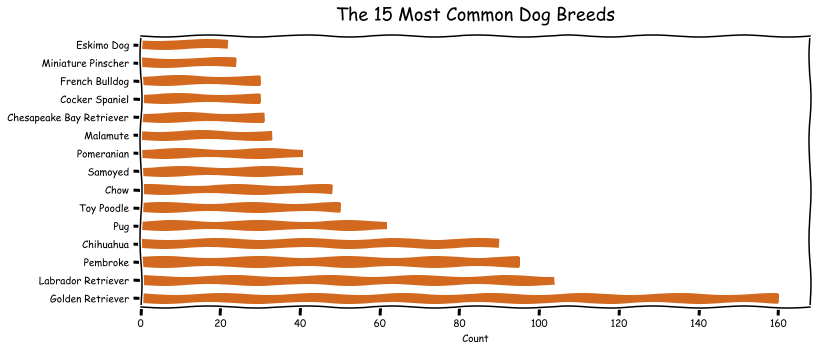

In [88]:
# plot histogram/bar chart of 10 most common dog breeds 
popular_dog_breeds.plot(kind='barh', color="chocolate", figsize=(12,5))

# labels
plt.title("The 15 Most Common Dog Breeds", fontsize=18, pad=15)
plt.xlabel('Count')
plt.show()

In [89]:
# Find mean ratings for each breed
master_df.groupby('breed').mean()

,tweet_id,rating_numerator,favorite_count,retweet_count,breed_conf,dog
breed,,,,,,
Afghan Hound,8.041621e+17,9.666667,16391.666667,5562.333333,0.433959,True
Airedale,7.184489e+17,9.833333,5006.750000,1296.333333,0.583771,True
American Staffordshire Terrier,7.597284e+17,10.312500,8898.125000,2151.625000,0.527359,True
Appenzeller,7.939334e+17,11.000000,6969.500000,1348.000000,0.503665,True
Australian Terrier,7.785921e+17,11.500000,10574.000000,2876.500000,0.307584,True
Basenji,7.007164e+17,10.333333,2367.888889,828.555556,0.419655,True
Basset,7.665597e+17,10.705882,11202.941176,2708.000000,0.522428,True
Beagle,7.109935e+17,10.150000,4169.550000,1255.750000,0.488758,True
Bedlington Terrier,7.843395e+17,10.333333,23909.333333,7777.000000,0.286043,True


In [90]:
# Most common dog names
names_df = master_df.dropna(subset=['name'])

# Extract 15 most popular dog names
names = names_df.name.value_counts()[:15]
names = names.sort_values(ascending=True)
names

Rusty       5
Bo          5
Koda        6
Jax         6
Lola        6
Toby        6
Winston     7
Sadie       7
Daisy       7
Penny       8
Charlie     9
Oliver      9
Tucker      9
Lucy       10
Cooper     11
Name: name, dtype: int64

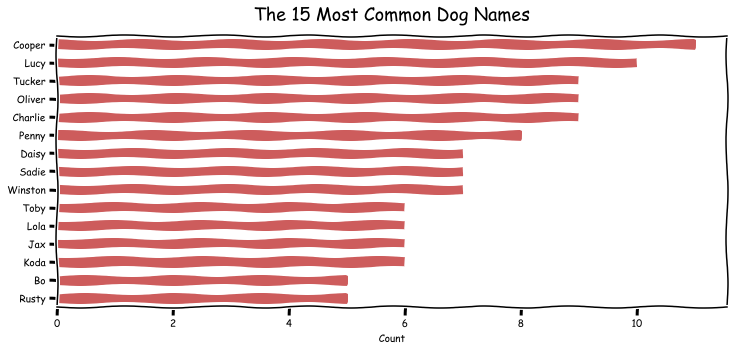

In [91]:
# plot histogram/bar chart of 15 most common dog names
names.plot(kind='barh', color="indianred", figsize=(12,5))

# labels
plt.title("The 15 Most Common Dog Names", fontsize=18, pad=15)
plt.xlabel('Count')
plt.show()

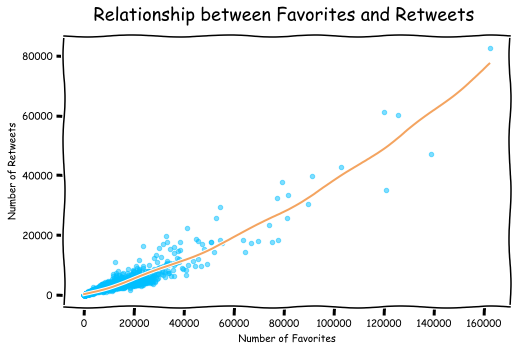

In [92]:
# How do Favorite counts and Retweet counts behave?
master_df.plot(kind='scatter', x='favorite_count', y='retweet_count', figsize=(8,5), color='deepskyblue', alpha=0.5)

plt.title("Relationship between Favorites and Retweets ", fontsize=18, pad=15)
plt.xlabel('Number of Favorites')
plt.ylabel('Number of Retweets')

# trendline
p = Polynomial.fit(master_df.favorite_count, master_df.retweet_count, 2)
plt.plot(*p.linspace(), color='sandybrown')

plt.show()

We see a exponential relationship between the number retweets and favorites. Consequently, we consider retweets to be the stronger measure of popularity. 

In [93]:
# Because of the quadratic relationship, we consider retweets count first, then favorite count 
# as the most important measure for popularity.
pop_tweets = master_df.sort_values(['retweet_count','favorite_count'], ascending=False)
pop_tweets[['name','retweet_count', 'favorite_count','breed','tweet_id','jpg_url']][:10]

,name,retweet_count,favorite_count,breed,tweet_id,jpg_url
55,NaN,82656,162513,Labrador Retriever,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...
58,NaN,61202,120110,Eskimo Dog,739238157791694849,https://pbs.twimg.com/ext_tw_video_thumb/73923...
552,Stephan,60284,125625,Chihuahua,807106840509214720,https://pbs.twimg.com/ext_tw_video_thumb/80710...
248,NaN,47127,138873,Lakeland Terrier,822872901745569793,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
306,Duddles,42952,103008,English Springer,879415818425184262,https://pbs.twimg.com/ext_tw_video_thumb/87941...
27,Bo,39651,91283,Standard Poodle,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg
554,NaN,37717,79456,Cocker Spaniel,806629075125202948,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg
81,Jamesy,35029,120736,French Bulldog,866450705531457537,https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg
1269,NaN,33352,81545,Bedlington Terrier,678399652199309312,https://pbs.twimg.com/ext_tw_video_thumb/67839...
1308,Kenneth,32300,77169,Whippet,676219687039057920,https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg


In [94]:
# show links of most popular dogs
for tweet_id in pop_tweets['tweet_id'][:10].values:
    print("https://twitter.com/dog_rates/status/" + str(tweet_id))

https://twitter.com/dog_rates/status/744234799360020481
https://twitter.com/dog_rates/status/739238157791694849
https://twitter.com/dog_rates/status/807106840509214720
https://twitter.com/dog_rates/status/822872901745569793
https://twitter.com/dog_rates/status/879415818425184262
https://twitter.com/dog_rates/status/819004803107983360
https://twitter.com/dog_rates/status/806629075125202948
https://twitter.com/dog_rates/status/866450705531457537
https://twitter.com/dog_rates/status/678399652199309312
https://twitter.com/dog_rates/status/676219687039057920


In [95]:
# show links of unpopular dogs
for tweet_id in pop_tweets['tweet_id'][-11:].values:
    print("https://twitter.com/dog_rates/status/" + str(tweet_id))

https://twitter.com/dog_rates/status/666691418707132416
https://twitter.com/dog_rates/status/666437273139982337
https://twitter.com/dog_rates/status/666029285002620928
https://twitter.com/dog_rates/status/666418789513326592
https://twitter.com/dog_rates/status/670676092097810432
https://twitter.com/dog_rates/status/666082916733198337
https://twitter.com/dog_rates/status/666033412701032449
https://twitter.com/dog_rates/status/666049248165822465
https://twitter.com/dog_rates/status/666407126856765440
https://twitter.com/dog_rates/status/666447344410484738
https://twitter.com/dog_rates/status/666102155909144576


In [96]:
# generate html tags for images
def tag_generator(pop_tweets): 
    img_tags = ""
    for url in pop_tweets['jpg_url'][:10].values:
        img_tags = img_tags + "<img src='" + url + "' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/>"
    return img_tags

tag_generator(pop_tweets)

"<img src='https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg' width=200 height=200

<h1>Most popular dogs according to their retweet and favorite counts.</h1>

<img src='https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/739238016737267712/pu/img/-tLpyiuIzD5zR1et.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/DAZAUfBXcAAG_Nn.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/678399528077250560/pu/img/BOjUNHRsYLeSo0hl.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/>
    


In [97]:
# Analyzing numerators
# most popular account according to user rating
pop_tweets = master_df.sort_values(['rating_numerator', 'retweet_count'], ascending=False)
pop_tweets[['name', 'rating_numerator', 'retweet_count','tweet_id','jpg_url']][:10]

,name,rating_numerator,retweet_count,tweet_id,jpg_url
27,Bo,14.0,39651,819004803107983360,https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg
246,NaN,14.0,18435,825535076884762624,https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg
91,Gabe,14.0,15728,822462944365645825,https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg
76,NaN,14.0,15461,881536004380872706,https://pbs.twimg.com/ext_tw_video_thumb/88153...
523,Gary,14.0,15137,813812741911748608,https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg
335,Walter,14.0,14289,868880397819494401,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg
841,Bretagne,14.0,14018,740373189193256964,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg
82,Cooper,14.0,7668,854120357044912130,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg
0,Cassie,14.0,7125,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg
449,Kuyu,14.0,6946,831911600680497154,https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg


In [98]:
for tweet_id in pop_tweets['tweet_id'][-11:].values:
    print("https://twitter.com/dog_rates/status/" + str(tweet_id))

https://twitter.com/dog_rates/status/707420581654872064
https://twitter.com/dog_rates/status/666649482315059201
https://twitter.com/dog_rates/status/667176164155375616
https://twitter.com/dog_rates/status/777885040357281792
https://twitter.com/dog_rates/status/673906403526995968
https://twitter.com/dog_rates/status/711306686208872448
https://twitter.com/dog_rates/status/718246886998687744
https://twitter.com/dog_rates/status/668989615043424256
https://twitter.com/dog_rates/status/678424312106393600
https://twitter.com/dog_rates/status/667878741721415682
https://twitter.com/dog_rates/status/835152434251116546


In [99]:
# Generate html for best rated tweets
tag_generator(pop_tweets)

"<img src='https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src=

<h1>Most popular dogs according to their user ratings.</h1>

<img src='https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/C3TjvitXAAAI-QH.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/C2n5rUUXEAIXAtv.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/C0s-XtzWgAAp1W-.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/><img src='https://pbs.twimg.com/media/C4uLLGuUoAAkIHm.jpg' width=200 height=200 alt='Most popular dogs' style='display:inline; padding: 3px; border: 5px; border-style: double; margin:5px;'/>


In [108]:
# show links of unpopular dogs
for tweet_id in pop_tweets['tweet_id'][-11:].values:
    print("https://twitter.com/dog_rates/status/" + str(tweet_id))

https://twitter.com/dog_rates/status/707420581654872064
https://twitter.com/dog_rates/status/666649482315059201
https://twitter.com/dog_rates/status/667176164155375616
https://twitter.com/dog_rates/status/777885040357281792
https://twitter.com/dog_rates/status/673906403526995968
https://twitter.com/dog_rates/status/711306686208872448
https://twitter.com/dog_rates/status/718246886998687744
https://twitter.com/dog_rates/status/668989615043424256
https://twitter.com/dog_rates/status/678424312106393600
https://twitter.com/dog_rates/status/667878741721415682
https://twitter.com/dog_rates/status/835152434251116546


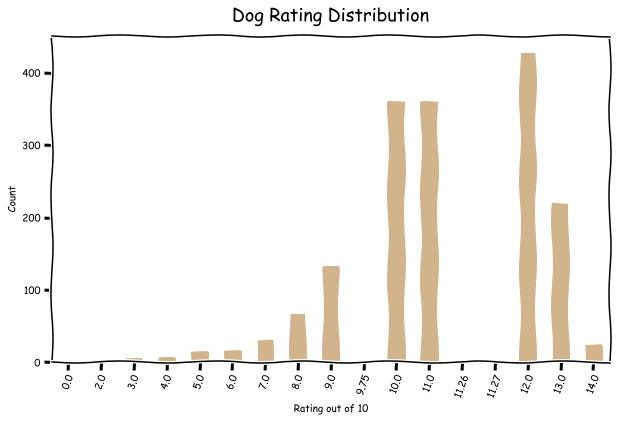

In [100]:
# Visualize distribution of ratings
pop_tweets.rating_numerator.value_counts().sort_index().plot('bar', color='tan', figsize=(10,6))

# labels
plt.title("Dog Rating Distribution", fontsize=18, pad=15)
plt.ylabel('Count')
plt.xlabel('Rating out of 10')
plt.xticks(rotation=70)
plt.show()

In [101]:
# Dog stages
master_df.dog_stage.value_counts()

without stage    1409
pupper            172
doggo              60
puppo              22
floofer             7
Name: dog_stage, dtype: int64

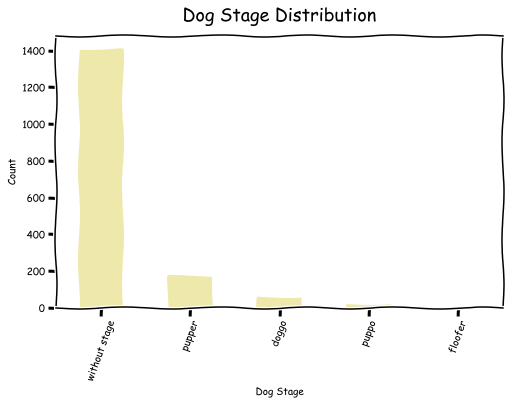

In [102]:
# Visualize distribution of dog stages
master_df.dog_stage.value_counts().plot('bar', color='palegoldenrod', figsize=(8,5))

# labels
plt.title("Dog Stage Distribution", fontsize=18, pad=15)
plt.ylabel('Count')
plt.xlabel('Dog Stage')
plt.xticks(rotation=70)
plt.show()

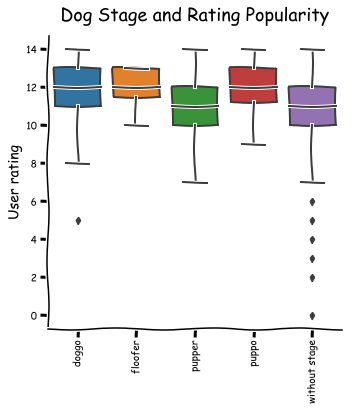

In [103]:
# Analyze popularity of dogs in terms of their stages
plt.rcParams['figure.figsize']= [12,10]

p1 = sns.catplot(x='dog_stage', y='rating_numerator', kind='box', data=master_df)

# labels and titles
plt.title("Dog Stage and Rating Popularity", fontsize=18, pad=15)
plt.xlabel('')
plt.ylabel('User rating', fontsize=14)
p1.set_xticklabels(rotation=90)

plt.show()


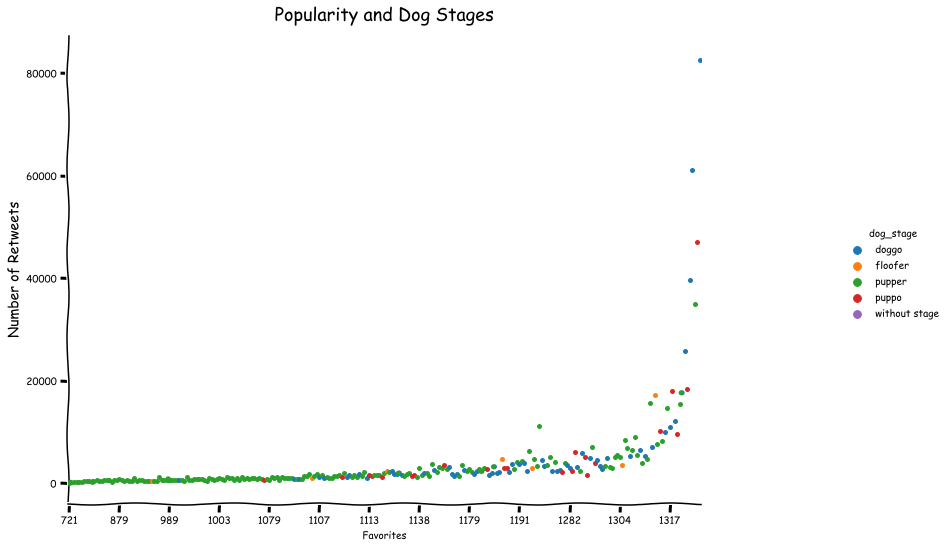

In [104]:
# remove all doges without stage
stages_df = master_df[master_df.dog_stage != "without stage"]

# plot swarm plot
sns.catplot(x="favorite_count", y="retweet_count", hue="dog_stage", kind="swarm", data=stages_df)

# style
plt.gcf().set_size_inches(15, 8)
sns.set_style("white")
sns.set_style("ticks", {"xtick.major.size": 0})
plt.title("Popularity and Dog Stages", fontsize=18, pad=15)
plt.xlabel('Favorites')
plt.ylabel('Number of Retweets', fontsize=14)

# customize ticks
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))

plt.show()

# source: https://stackoverflow.com/questions/38809061/remove-some-x-labels-with-seaborn

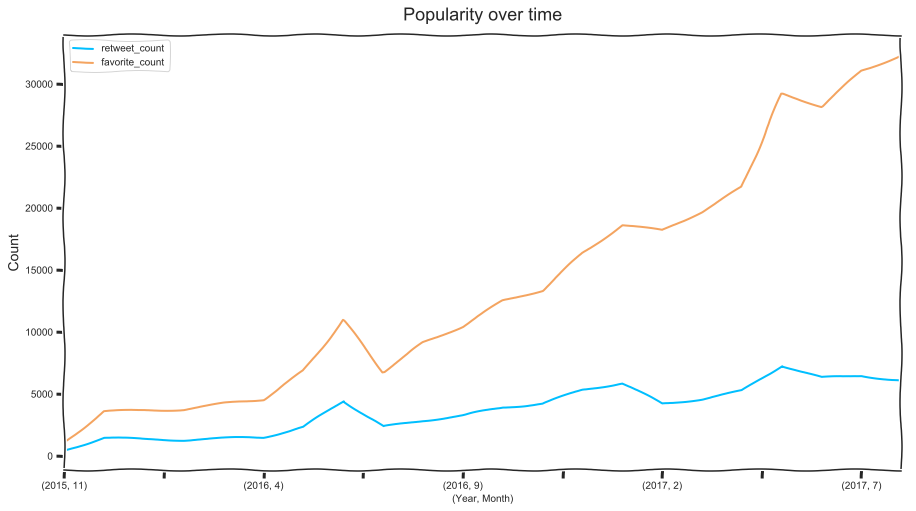

In [105]:
# Analyze popularity over time
# master_df.timestamp = pd.to_datetime(master_df.timestamp) # uncomment if master was read-in from csv
master_df.retweet_count.groupby([master_df.timestamp.dt.year, master_df.timestamp.dt.month]).mean().plot(color='deepskyblue', figsize=(15,8))

master_df.favorite_count.groupby([master_df.timestamp.dt.year, master_df.timestamp.dt.month]).mean().plot(color='sandybrown')

# labels and titles
plt.title("Popularity over time", fontsize=18, pad=15)
plt.xlabel('(Year, Month)')
plt.ylabel('Count', fontsize=14)
plt.legend()
plt.show()


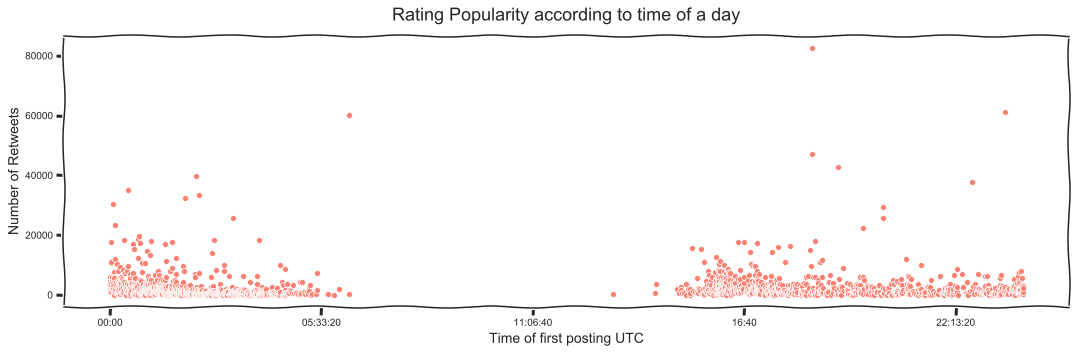

In [106]:
# Analyze popularity over time of the day
grouped = master_df.retweet_count.groupby([master_df.timestamp.dt.time]).mean()
ax = sns.scatterplot(data=grouped, color="salmon")

# style
plt.gcf().set_size_inches(18, 5)
plt.title("Rating Popularity according to time of a day", fontsize=18, pad=15)
plt.xlabel('Time of first posting UTC', fontsize=14)
plt.ylabel('Number of Retweets', fontsize=14)

plt.show()

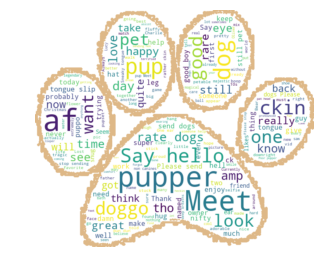

<Figure size 864x720 with 0 Axes>

In [107]:
# Word cloud
# code source: https://github.com/amueller/word_cloud/blob/master/examples/masked.py

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# Read the whole text.
text = master_df.text.str.cat(sep=' ')

# read the mask image
# Image from von pnpresse.com
paw_mask = np.array(Image.open(path.join(d,'paw-mask.jpg')))

stopwords = set(STOPWORDS)
stopwords.add("@dog_rates")

wc = WordCloud(background_color="white", max_words=200, mask=paw_mask,
               stopwords=stopwords, contour_width=5, contour_color='burlywood')

# generate word cloud
wc.generate(text)

# store to file
wc.to_file(path.join(d, "paw_cloud.png"))

# show
fig = plt.figure(figsize=(5,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.show()

# Reporting<a name="reporting"></a>
Please find a report about the data wrangling process in wrangle_report.pdf or wrangle_report.html. For the results of the analysis and further explanation of the visualization, please refer to act_report.pdf or act_report.html.